In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
h=pd.read_csv('../data/BrotherSisterData.csv')
h

,brother,sister
0,174,172
1,183,180
2,154,148
3,172,180
4,172,165
5,161,159
6,167,159
7,172,164
8,195,188
9,189,175


In [128]:
h=pd.read_csv('../data/BrotherSisterDataLongform.csv')
h['sorted']=h.height.sort_values(ascending=True, ignore_index=True)
h['heightr']=h.height/10
h['sortedr']=h.sorted/10
h


,sex,height,sorted,heightr,sortedr
0,Male,174,148,17.4,14.8
1,Male,183,154,18.3,15.4
2,Male,154,157,15.4,15.7
3,Male,172,159,17.2,15.9
4,Male,172,159,17.2,15.9
5,Male,161,160,16.1,16.0
6,Male,167,161,16.7,16.1
7,Male,172,161,17.2,16.1
8,Male,195,162,19.5,16.2
9,Male,189,163,18.9,16.3


In [110]:
h.query('sex=="Male"').height.mean()-h.query('sex=="Female"').height.mean()

4.799999999999983

9.205677041691086

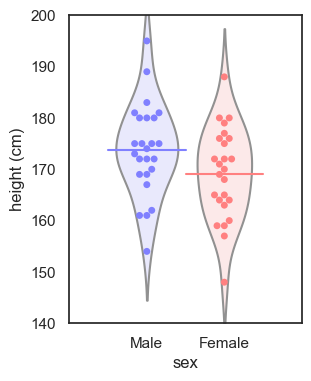

In [129]:
plt.figure(figsize=(3,4))
sns.violinplot(data=h,  x='sex', y='height', palette=[[0.9,0.9,1],[1,0.9,0.9]], inner=None)
sns.swarmplot(data=h, x='sex', y='height', hue='sex', palette=[[0.5,0.5,1],[1,0.5,0.5]], legend=False)
plt.plot([-0.5,0.5],[h.query('sex=="Male"').height.mean(), h.query('sex=="Male"').height.mean()],color=[0.5,0.5,1])
plt.plot([0.5,1.5],[h.query('sex=="Female"').height.mean(), h.query('sex=="Female"').height.mean()],color=[1,0.5,0.5])
plt.ylim(140,200)
plt.xlim(-1,2)
plt.ylabel('height (cm)')
h.height.std()

In [61]:
h.heightr.mean()

17.148

-12.400000000000006

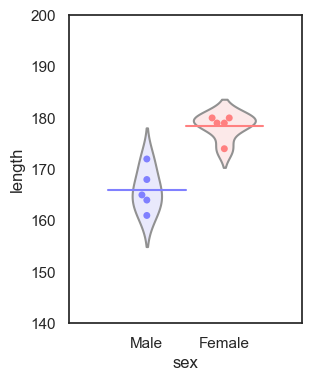

In [116]:
plt.figure(figsize=(3,4))
sns.violinplot(data=h,  x='sex', y='sorted', palette=[[0.9,0.9,1],[1,0.9,0.9]], inner=None)
sns.swarmplot(data=h, x='sex', y='sorted', hue='sex', palette=[[0.5,0.5,1],[1,0.5,0.5]], legend=False)
plt.plot([-0.5,0.5],[h.query('sex=="Male"').sorted.mean(), h.query('sex=="Male"').sorted.mean()],color=[0.5,0.5,1])
plt.plot([0.5,1.5],[h.query('sex=="Female"').sorted.mean(), h.query('sex=="Female"').sorted.mean()],color=[1,0.5,0.5])
plt.ylim(140,200)
plt.xlim(-1,2)
plt.ylabel('length')

h.query('sex=="Male"').sorted.mean() - h.query('sex=="Female"').sorted.mean()

In [ ]:



plt.figure(figsize=(3,4))
sns.violinplot(data=h, palette=[[0.9,0.9,1],[1,0.9,0.9]], inner=None)
sns.swarmplot(data=h, palette=[[0.5,0.5,1],[1,0.5,0.5]])
plt.plot([-0.5,0.5],[h.brother.mean(), h.brother.mean()],color=[0.5,0.5,1])
plt.plot([0.5,1.5],[h.sister.mean(), h.sister.mean()],color=[1,0.5,0.5])
plt.ylim(140,200)
plt.xlim(-1,2)
plt.ylabel('height')

-0.4480000000000004
0.03999999999999915
-0.8879999999999981
-0.14399999999999835


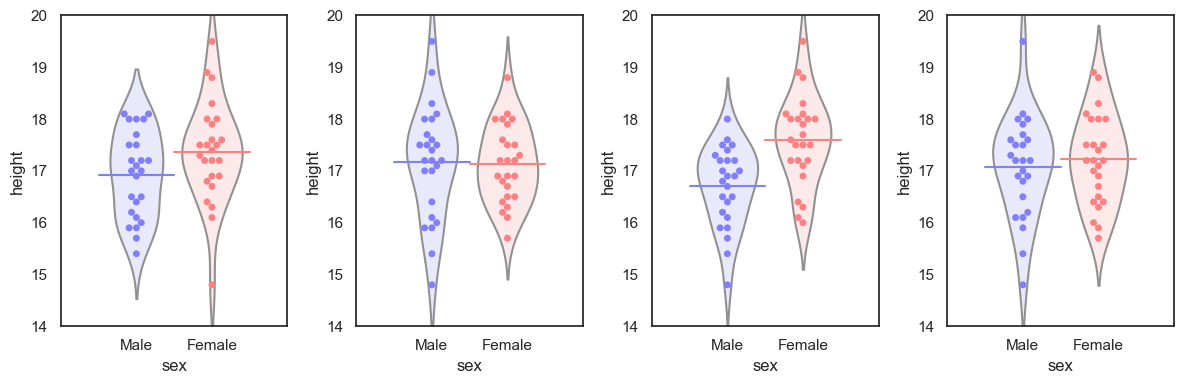

In [70]:
plt.figure(figsize=(12,4))
for i in range(4):
    h['heightr'] = np.random.permutation(h.heightr)

    plt.subplot(1,4,i+1)
    sns.violinplot(data=h,  x='sex', y='heightr', palette=[[0.9,0.9,1],[1,0.9,0.9]], inner=None)
    sns.swarmplot(data=h, x='sex', y='heightr', hue='sex', palette=[[0.5,0.5,1],[1,0.5,0.5]], legend=False)
    plt.plot([-0.5,0.5],[h.query('sex=="Male"').heightr.mean(), h.query('sex=="Male"').heightr.mean()],color=[0.5,0.5,1])
    plt.plot([0.5,1.5],[h.query('sex=="Female"').heightr.mean(), h.query('sex=="Female"').heightr.mean()],color=[1,0.5,0.5])
    plt.ylim(14,20)
    plt.xlim(-1,2)
    plt.ylabel('height')
    print(h.query('sex=="Male"').heightr.mean() - h.query('sex=="Female"').heightr.mean())
    
plt.tight_layout()
plt.show()

In [117]:
def dMeans(x, y):
    return np.mean(x)-np.mean(y)

results = stats.permutation_test((h.query('sex == "Male"').height, h.query('sex == "Female"').height), dMeans, 
                                  permutation_type='independent', alternative='greater', n_resamples=100000)
print(results)

PermutationTestResult(statistic=4.799999999999983, pvalue=0.17063492063492064, null_distribution=array([  4.8,   9.2,  12.4,   7.6,   6. ,   6.4,   2. ,   5.2,   0.4,
        -1.2,  -0.8,   9.6,   4.8,   3.2,   3.6,   8. ,   6.4,   6.8,
         1.6,   2. ,   0.4,   1.6,   4.8,   0. ,  -1.6,  -1.2,   9.2,
         4.4,   2.8,   3.2,   7.6,   6. ,   6.4,   1.2,   1.6,   0. ,
         2. ,  -2.8,  -4.4,  -4. ,   0.4,  -1.2,  -0.8,  -6. ,  -5.6,
        -7.2,   4.8,   3.2,   3.6,  -1.6,  -1.2,  -2.8,   1.6,   2. ,
         0.4,  -4.4,   2. ,   5.2,   0.4,  -1.2,  -0.8,   9.6,   4.8,
         3.2,   3.6,   8. ,   6.4,   6.8,   1.6,   2. ,   0.4,   2.4,
        -2.4,  -4. ,  -3.6,   0.8,  -0.8,  -0.4,  -5.6,  -5.2,  -6.8,
         5.2,   3.6,   4. ,  -1.2,  -0.8,  -2.4,   2. ,   2.4,   0.8,
        -4. ,   2. ,  -2.8,  -4.4,  -4. ,   0.4,  -1.2,  -0.8,  -6. ,
        -5.6,  -7.2,   4.8,   3.2,   3.6,  -1.6,  -1.2,  -2.8,   1.6,
         2. ,   0.4,  -4.4,  -2.4,  -4. ,  -3.6,  -8.8,  -8.4, 

Text(0, 0.5, 'frequency')

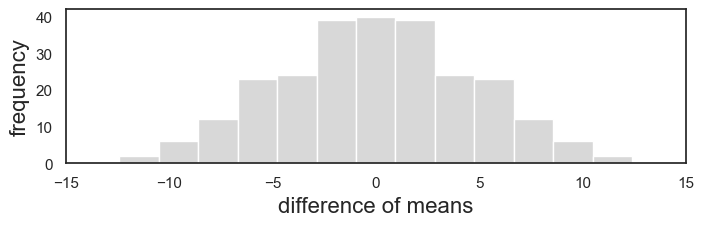

In [127]:
plt.figure(figsize=(8,2))
sns.histplot(results.null_distribution,  color=[0.8, 0.8, 0.8])
plt.xlim([-15, 15])
plt.xlabel('difference of means', fontsize=16)
plt.ylabel('frequency', fontsize=16)

In [121]:
np.mean(results.null_distribution>5.1)

0.0252

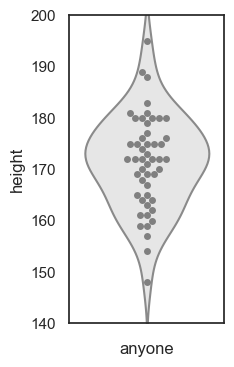

In [133]:
plt.figure(figsize=(2,4))
sns.violinplot(data=h, y='height', color=[0.9, 0.9, 0.9], inner=None)
sns.swarmplot(data=h, y='height', color=[0.5, 0.5, 0.5])   
plt.ylim(140,200)
plt.xlabel('anyone')
plt.show()



In [136]:
def dMeans(x, y):
    return np.mean(x-y)

results = stats.permutation_test((h.query('sex == "Male"').height, h.query('sex == "Female"').height), dMeans, 
                                  permutation_type='independent', alternative='greater', n_resamples=100000)
print(results)

PermutationTestResult(statistic=4.64, pvalue=0.03945960540394596, null_distribution=array([-2.16, -0.8 ,  0.8 , ..., -2.56,  1.84, -3.6 ]))


In [137]:
np.mean(results.null_distribution>5.1)

0.02554